## FIRST PART - MY IMAGE

#### I HAVE USED BLOCK 5 CONV 2 (ONE LAYER BEFORE) AND BLOCK 5 CONV 1 (PREVIOUS THAN THAT)


In [0]:
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2

Using TensorFlow backend.


In [0]:
model = VGG16(weights="imagenet")
from skimage import io

W0701 15:28:56.589899 140357754189696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0701 15:28:56.614686 140357754189696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 15:28:56.618578 140357754189696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0701 15:28:56.646928 140357754189696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0701 15:28:58.399134 140357754189696 deprecation_wrapp

In [0]:
img = io.imread("https://avatars1.githubusercontent.com/u/37265950?s=400&u=08820314a828b6b340c21ece5619dadd4d848b4e&v=4")
img = cv2.resize(img,dsize=(224,224),interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

### LOADED BLOCK 5 CONV 2

In [0]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv2")

419


In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

(?, 14, 14, 512)


In [0]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

(14, 14, 512)
(14, 14)


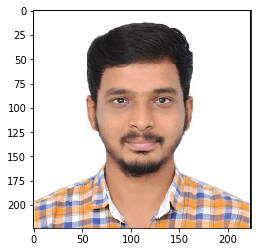

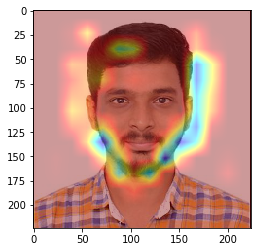

In [0]:
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
plt.imshow(img)
plt.show()
plt.imshow(superimposed_img)
plt.show()

### LOADED BLOCK 5 CONV 1

In [0]:
last_conv_layer = model.get_layer("block5_conv1")

In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

(?, 14, 14, 512)


In [0]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

(14, 14, 512)
(14, 14)


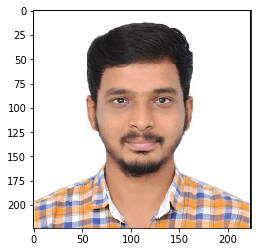

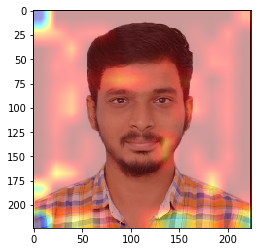

In [0]:
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
plt.imshow(img)
plt.show()
plt.imshow(superimposed_img)
plt.show()

## SECOND PART -  TONY STARK IMAGE

In [0]:
img = io.imread("/content/gdrive/My Drive/TonyStark.jpg")
img = cv2.resize(img,dsize=(224,224),interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

#### USING ONE PREVIOUS LAYER - BLOCK 5 CONV 2

In [0]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv2")

837


In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

(?, 14, 14, 512)


In [0]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

(14, 14, 512)
(14, 14)


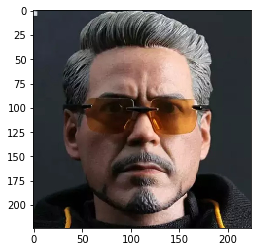

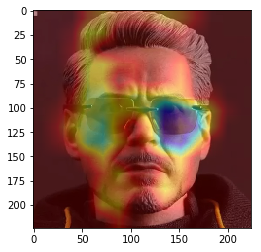

In [0]:
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
plt.imshow(img)
plt.show()
plt.imshow(superimposed_img)
plt.show()

#### USING PREVIOUS LAYER - BLOCK 5 CONV 1

In [0]:
img = io.imread("/content/gdrive/My Drive/TonyStark.jpg")
img = cv2.resize(img,dsize=(224,224),interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)

In [0]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv1")

837


In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

(?, 14, 14, 512)


In [0]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

(14, 14, 512)
(14, 14)


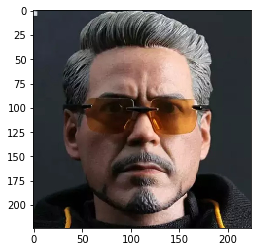

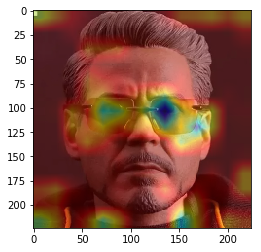

In [0]:
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
plt.imshow(img)
plt.show()
plt.imshow(superimposed_img)
plt.show()

## Saliency

To visualize activation over final dense layer outputs, we need to switch the softmax activation out for linear since gradient of output node will depend on all the other node activations. Doing this in keras is tricky, so we provide utils.apply_modifications to modify network parameters and rebuild the graph.

If this swapping is not done, the results might be suboptimal. We will start by swapping out 'softmax' for 'linear'.

In [0]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations

# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


#### Lets load a couple of test images to try saliency.

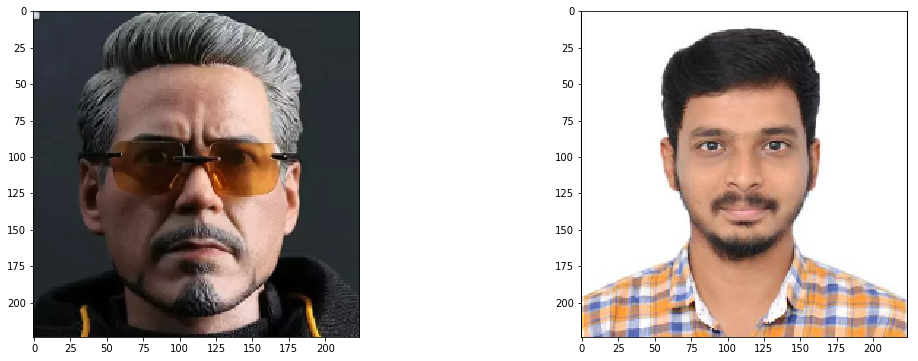

In [0]:
from vis.utils import utils
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

img1 = io.imread("/content/gdrive/My Drive/TonyStark.jpg")
img2 = io.imread("https://avatars1.githubusercontent.com/u/37265950?s=400&u=08820314a828b6b340c21ece5619dadd4d848b4e&v=4")

img1 = cv2.resize(img1,(224,224))
img2 = cv2.resize(img2,(224,224))
#plt.imshow(img1)
#plt.imshow(img2)
#img1 = img1.resize(img1,(224,224))
#img2 = img2.resize(img2,(224,224))
#img1 = utils.load_img('images/ouzel1.jpg', target_size=(224, 224))
#img2 = utils.load_img('images/ouzel2.jpg', target_size=(224, 224))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

In [0]:
!pip install scipy==1.1

In [0]:
from scipy.misc import imresize

In [0]:
pip install git+git://github.com/raghakot/keras-vis.git --upgrade --no-deps

  Cloning git://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-9znuiha3
  Running command git clone -q git://github.com/raghakot/keras-vis.git /tmp/pip-req-build-9znuiha3
  Stored in directory: /tmp/pip-ephem-wheel-cache-55hika11/wheels/ff/01/8e/3a66d951f9b53f9894a010107b05253fb9a6c6f2555a5aaeca
Successfully built keras-vis
  Found existing installation: keras-vis 0.5.0
    Uninstalling keras-vis-0.5.0:
      Successfully uninstalled keras-vis-0.5.0


## Time for saliency visualization.

22


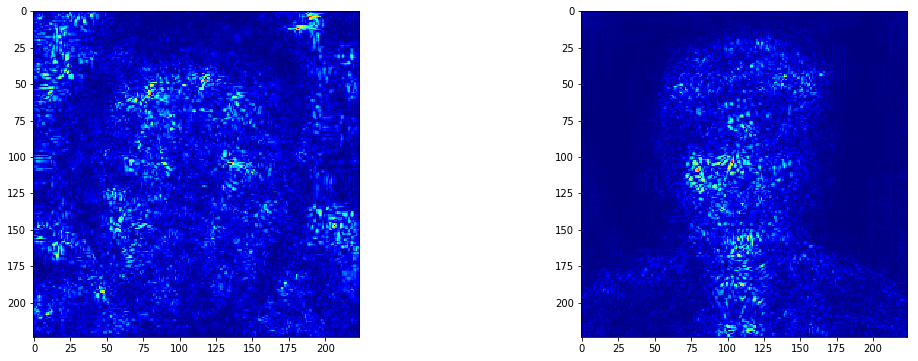

In [0]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')
print(layer_idx)

f, ax = plt.subplots(1, 2)
for i, img in enumerate([img1, img2]):    
    # 20 is the imagenet index corresponding to `ouzel`
    grads = visualize_saliency(model, layer_idx, filter_indices=20, seed_input=img)
    
    # visualize grads as heatmap
    ax[i].imshow(grads, cmap='jet')

Not that great. Very noisy. Lets try guided and rectified saliency.

To use guided saliency, we need to set backprop_modifier='guided'. For rectified saliency or deconv saliency, use backprop_modifier='relu'.

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


<Figure size 1296x432 with 0 Axes>

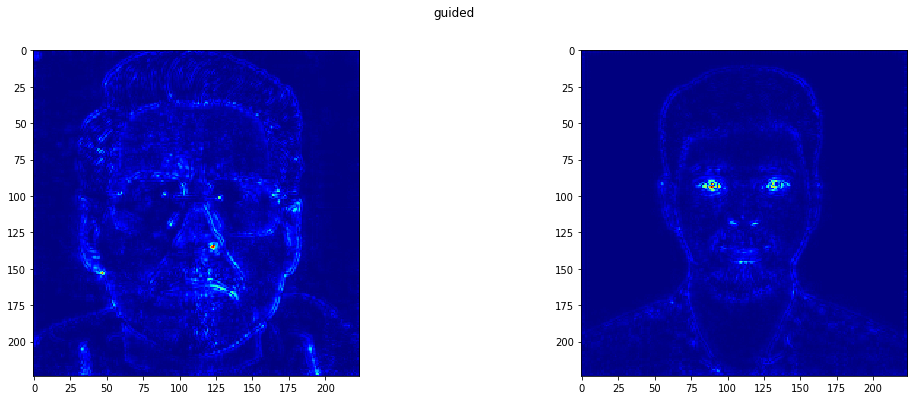

<Figure size 1296x432 with 0 Axes>

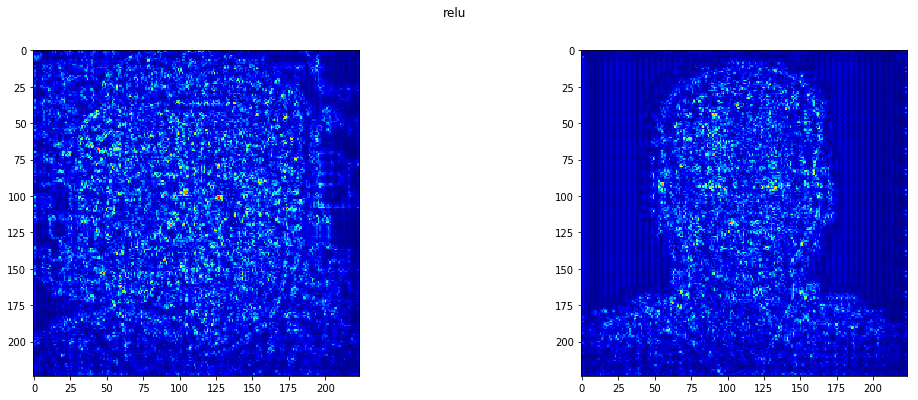

In [0]:
for modifier in ['guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_saliency(model, layer_idx, filter_indices=20, 
                                   seed_input=img, backprop_modifier=modifier)
        # Lets overlay the heatmap onto original image.    
        ax[i].imshow(grads, cmap='jet')

## grad-CAM - vanilla, guided, rectified

These should contain more detail since they use Conv or Pooling features that contain more spatial detail which is lost in Dense layers. The only additional detail compared to saliency is the penultimate_layer_idx. This specifies the pre-layer whose gradients should be used. See this paper for technical details: https://arxiv.org/pdf/1610.02391v1.pdf

By default, if penultimate_layer_idx is not defined, it searches for the nearest pre layer. For our architecture, that would be the block5_pool layer after all the Conv layers. Here is the model summary for reference.

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

<Figure size 1296x432 with 0 Axes>

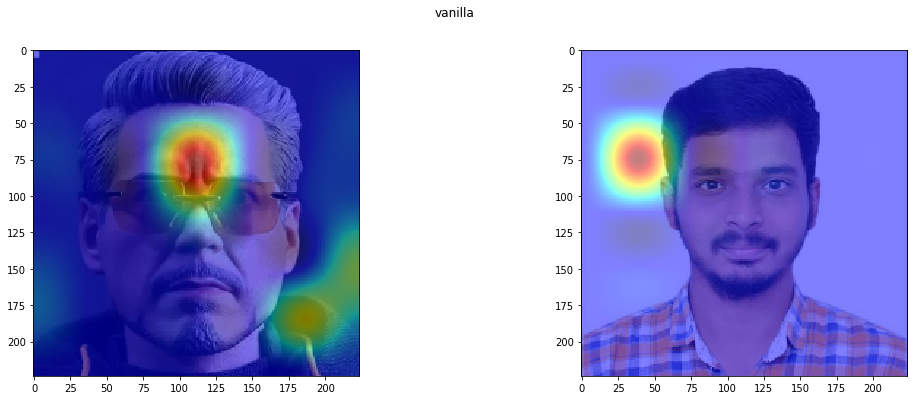

<Figure size 1296x432 with 0 Axes>

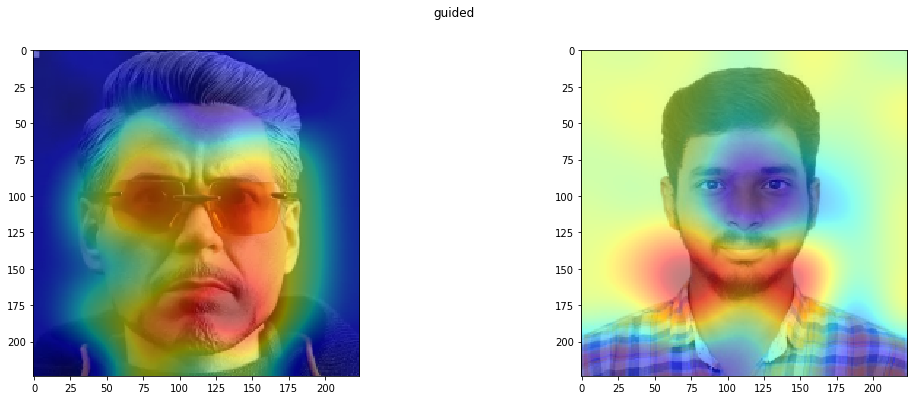

<Figure size 1296x432 with 0 Axes>

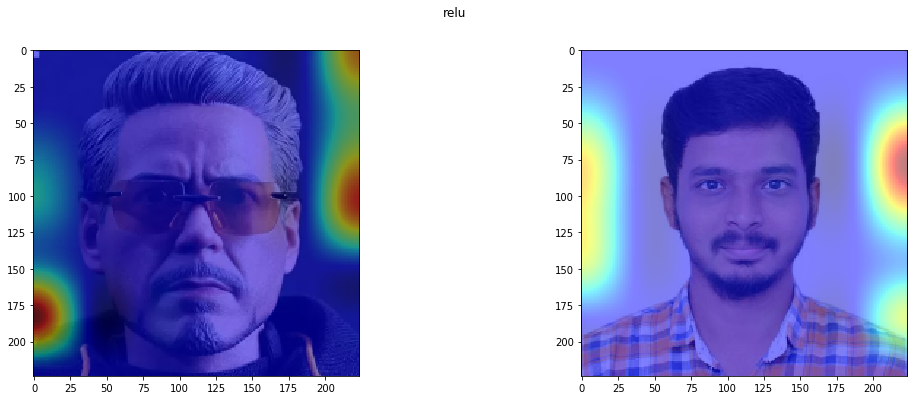

In [0]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_cam(model, layer_idx, filter_indices=20, 
                              seed_input=img, backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))

## 10B ASSIGNMENT - EXPLAINING WHY RECEPTIVE FIELD INCREASED FROM 29 TO 45.


-  It is the normal calculation where they have used 3x3 kernel with padding 1 in first convolution and 3x3 with strides 2 in second convolution and it just repeats.

**FORMULA :**

Rout = Rin + (k-1)*Jin

k = kernel size

Jin = Input jump size: Jump happens because of strides.

| K,S  |    I/P     |    O/P     |      Rout       | Jin  | Jout    |
| :--: | :--------: | :--------: | :-------------: | :--: | ------- |
|      |            |            |        1        |  1   | 1       |
| 3,1  | 128x128x96 | 128x128x96 |  1+(3-1)*1 = 3  |  1   | 1x1 = 1 |
| 3,2  | 128x128x96 |  64x64x48  |  3+(3-1)*1 = 5  |  1   | 1x2 = 2 |
| 3,1  |  64x64x48  |  64x64x48  |  5+(3-1)*2 = 9  |  2   | 2x1 = 2 |
| 3,2  |  64x64x48  |  32x32x24  | 9+(3-1)*2 = 13  |  2   | 2x2 = 4 |
| 3,1  |  32x32x24  |  32x32x24  | 13+(3-1)*4 = 21 |  4   | 4x1 = 4 |
| 3,2  |  32x32x24  |  16x16x12  | **21+(3-1)*4 = 29** |  4   | 4x2 = 8 |
| 3,1  |  16x16x12  |  16x16x12  | **29+(3-1)*8 = 45** |  8   | 8x1 = 8 |